# **Exploring Bank Customer Attrition: An EDA Approach**
Analysis conducted by Moyin Odumewu

Feb. 2025

**Introduction**

The objective of this project is to analyze customer financial data, identify key behavioral patterns, and uncover factors influencing customer churn. By performing Exploratory Data Analysis (EDA) on the dataset, we aim to derive actionable insights that can help a financial services company optimize customer retention strategies, improve credit risk management, and enhance targeted marketing efforts.

# Libraries import

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# upload dataset csv
from google.colab import files
uploaded = files.upload()

Saving Bank-Customer-Attrition-Insights-Data.csv to Bank-Customer-Attrition-Insights-Data.csv


In [ ]:
# import dataset
df =pd.read_csv('Bank-Customer-Attrition-Insights-Data.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15598695    Fields          619    France  Female   42   
1          2    15649354  Johnston          608     Spain  Female   41   
2          3    15737556  Vasilyev          502    France  Female   42   
3          4    15671610    Hooper          699    France  Female   39   
4          5    15625092   Colombo          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [ ]:
# view bottom rows of table
df.tail()

RowNumber  CustomerId     Surname  CreditScore Geography  Gender  Age  \
9995       9996    15583480      Morgan          771    France    Male   39   
9996       9997    15620341     Nwebube          516    France    Male   35   
9997       9998    15613886    Trevisan          709    France  Female   36   
9998       9999    15792916  Ositadimma          772   Germany    Male   42   
9999      10000    15710408  Cunningham          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
9995         96270.64       0         0                   1   DIAMOND   
9996        101699.77       0         0                   5  PLATINUM   
9997         42085.58       1         1                   3    SILVER   
9998         92888.52       1         1                   2      GOLD   
9999         38190.78       0         0                   3   DIAMOND   

      Point Earned  
9995           300  
9996           771  
9997           564  
9998           339  
9999           911

In [ ]:
# check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

### Key Observations:
- The dataset contains **18 columns** and **10,005 entries**.
- The `CustomerId` column is stored as an **object** type.
- Numerical columns include `CreditScore`, `Age`, `Balance`, and `PointEarned`, among others.
- There are no missing values, as all columns have **10,005 non-null** entries.
- The data types (`dtypes`) are a mix of integers (`int64`), floating-point numbers (`float64`), and categorical (`object`).

### Analysis Note:
The dataset structure is in order, and modifying the `CustomerId` datatype is necessary for the analysis.


In [ ]:
# summary statistics
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited      Complain  Satisfaction Score  \
count     10000.000000  10000.000000  10000.000000        10000.000000   
mean     100090.239881      0.203800      0.204400            3.013800   
std       57510.492818      0.402842      0.403283            1.405919   
min          11.580000      0.000000      0.000000            1.000000   
25%       51002.110000      0.000000      0.000000            2.000000   
50%      100193.915000      0.000000      0.000000            3.000000   
75%      149388.247500      0.000000      0.000000            4.000000   
max      199992.480000      1.000000      1.000000            5.000000   

       Point Earned  
count  10000.000000  
mean     606.515100  
std      225.924839  
min      119.000000  
25%      410.000000  
50%      605.000000  
75%      801.000000  
max     1000.000000

# Handling missing values and duplicates

In [ ]:
# to get the number of missing values
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [ ]:
# Handling Duplicates
# to check for duplicate
df.duplicated().sum()

# to Remove duplicates
df.drop_duplicates(inplace=True)

The dataset has no missing values or duplicates

Analyze datatypes(dtype) and convert if necessary

In [ ]:
# Ensure 'Exited' column is categorical
df['Exited'] = df['Exited'].astype(str)
# encode Exited from 1 and 0 to Yes and no
df['Exited'  ] = df['Exited'].replace({'1': 'Yes', '0': 'No'})

# Ensure 'IsActiveMember' column is categorical
df['IsActiveMember'] = df['IsActiveMember'].astype(str)
# encode Exited from 1 and 0 to Yes and no
df['IsActiveMember'  ] = df['IsActiveMember'].replace({'1': 'Yes', '0': 'No'})

# Ensure 'HasCrCard' column is categorical
df['HasCrCard'] = df['HasCrCard'].astype(str)
# encode Exited from 1 and 0 to Yes and no
df['HasCrCard'  ] = df['HasCrCard'].replace({'1': 'Yes', '0': 'No'})

# Ensure 'Complain' column is categorical
df['Complain'] = df['Complain'].astype(str)
# encode Exited from 1 and 0 to Yes and no
df['Complain'  ] = df['Complain'].replace({'1': 'Yes', '0': 'No'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  object 
 11  IsActiveMember      10000 non-null  object 
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  object 
 14  Complain            10000 non-null  object 
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
# change column name
df.rename(columns={'Exited': 'Churned'}, inplace=True)
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15598695    Fields          619    France  Female   42   
1          2    15649354  Johnston          608     Spain  Female   41   
2          3    15737556  Vasilyev          502    France  Female   42   
3          4    15671610    Hooper          699    France  Female   39   
4          5    15625092   Colombo          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts HasCrCard IsActiveMember  EstimatedSalary  \
0       2       0.00              1       Yes            Yes        101348.88   
1       1   83807.86              1        No            Yes        112542.58   
2       8  159660.80              3       Yes             No        113931.57   
3       1       0.00              2        No             No         93826.63   
4       2  125510.82              1       Yes            Yes         79084.10   

  Churned Complain  Satisfaction Score Card Type  Point Earned  
0     Yes      Yes                   2   DIAMOND           464  
1      No      Yes                   3   DIAMOND           456  
2     Yes      Yes                   3   DIAMOND           377  
3      No       No                   5      GOLD           350  
4      No       No                   5      GOLD           425

# **Univariate Analysis Findings**

Distribution of Numerical Variables

- Age Distribution: Most customers are between 30-50 years old.
- Credit Score: Normally distributed, with most customers scoring between 600-800.
- Balance: Many customers have a zero balance, indicating inactive or low-usage accounts.
- Estimated Salary: Spread evenly, suggesting a diverse customer base.
- Number of Products: Most customers have one or two products, with fewer having three or more.
- Points Earned: Varies widely, likely linked to customer engagement.

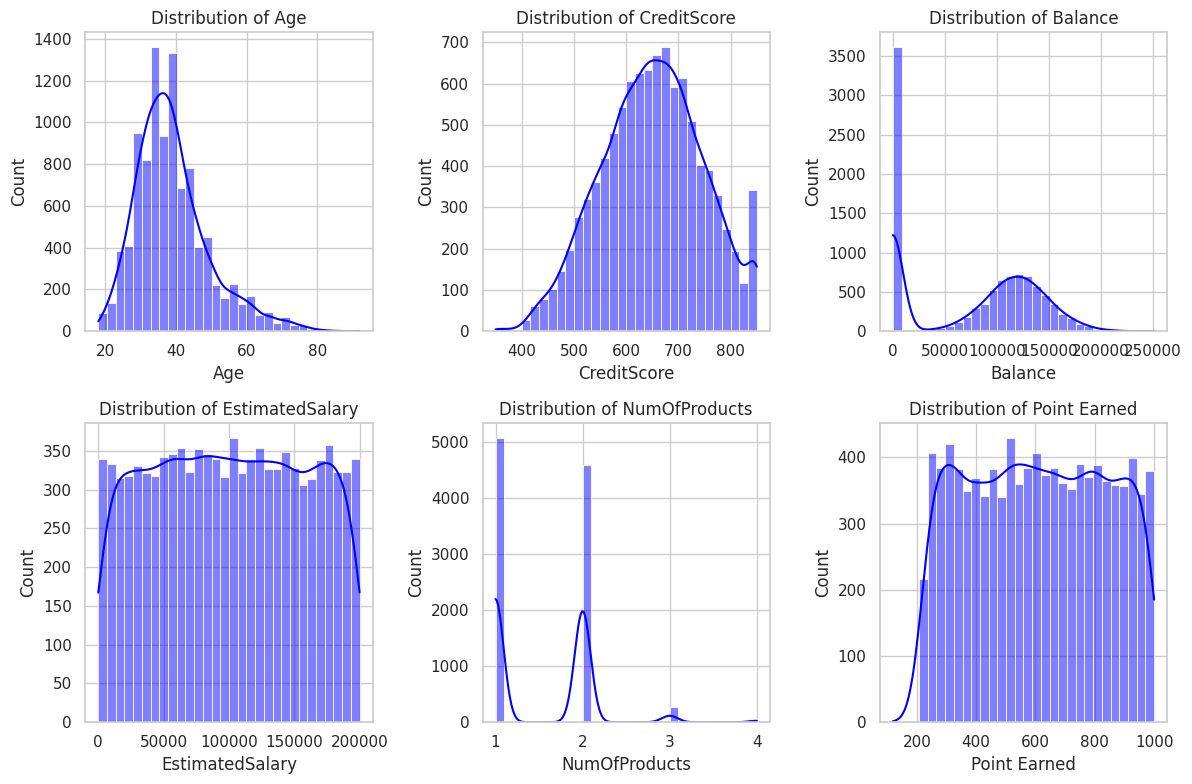

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Select numerical columns for univariate analysis
numeric_columns = ["Age", "CreditScore", "Balance", "EstimatedSalary", "NumOfProducts", "Point Earned"]

# Plot histograms for numerical variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


**Numerical Variable Insights**

- Age Distribution

The distribution is right-skewed, with most customers aged between 30 and 40 years.
Very few customers are above 60 years.
This suggests that the bank's primary customer base consists of middle-aged individuals, possibly in their prime working years.

- Credit Score Distribution

The distribution is approximately normal, centered around 600-700.
Few customers have extremely low credit scores (below 400), while some have very high scores (above 800).
A good number of customers have average to above-average creditworthiness.

- Estimated Salary Distribution

The distribution appears uniform, meaning that salaries are evenly spread across different ranges.
This suggests no salary bias in the dataset, implying customers come from various income groups.

- Balance Distribution

Most customers have either zero balance or a balance concentrated around 100,000-150,000.
A large spike at zero balance indicates that many customers might not keep funds in their accounts, possibly due to frequent withdrawals or inactivity.
A smaller peak around mid-range balances suggests some customers maintain steady savings.

- Number of Products Distribution

The majority of customers use either 1 or 2 products.
Very few customers use 3 or 4 products.
This implies that most customers prefer fewer financial products, and there may be a challenge in cross-selling additional services.

- Points Earned Distribution

The distribution is evenly spread across different values.
Customers earn points at various levels, suggesting a balanced engagement in reward programs.
No significant clusters or outliers indicate a fair point distribution system.

**OUTLIERS ANALYSIS**

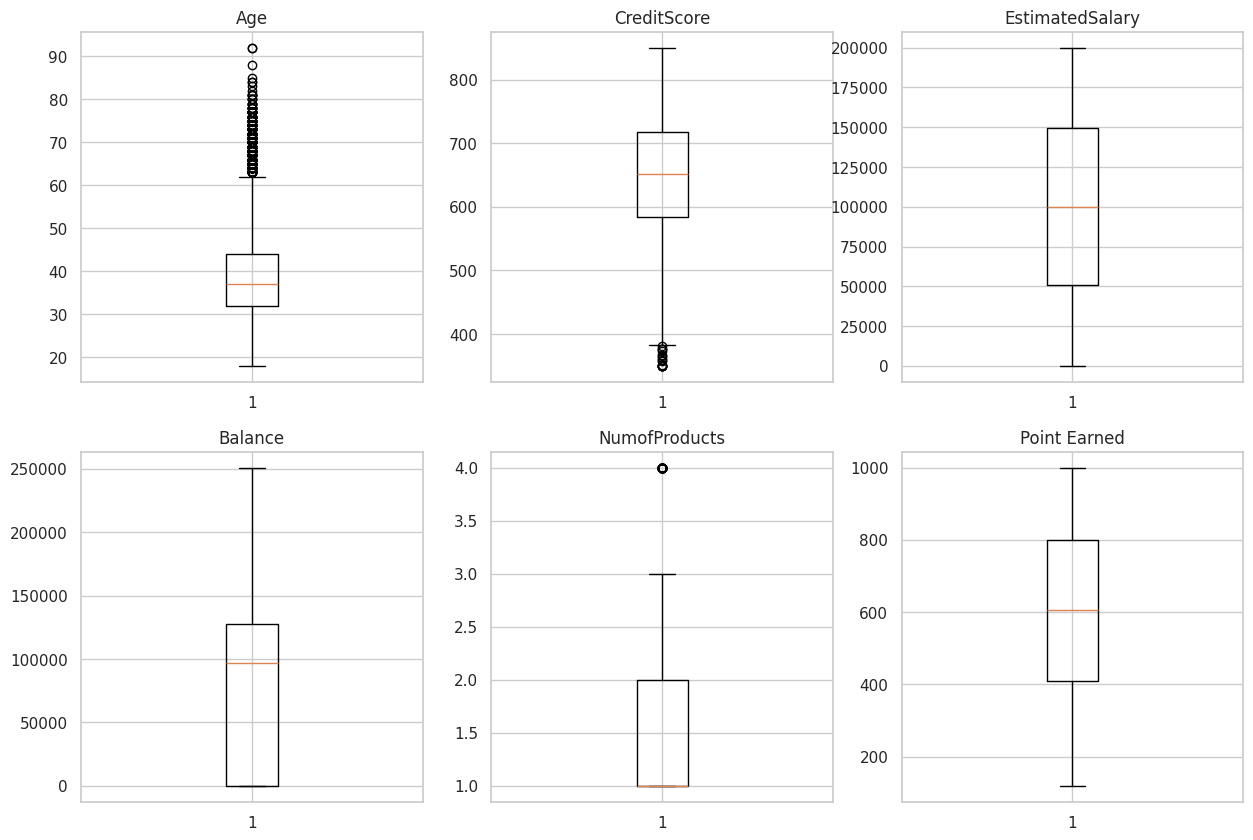

In [ ]:
# looking for outliers
fig, axs = plt.subplots(2,3,figsize=(15,10))

# boxplot for Age
axs[0,0].boxplot(df['Age'])
axs[0,0].set_title("Age")

# boxplot for Creditscore
axs[0,1].boxplot(df['CreditScore'])
axs[0,1].set_title("CreditScore")

# boxplot for cost of EstimatedSalary
axs[0,2].boxplot(df['EstimatedSalary'])
axs[0,2].set_title("EstimatedSalary")

# boxplot for Balance
axs[1,0].boxplot(df['Balance'])
axs[1,0].set_title("Balance")


# histogram for NumofProducts
axs[1,1].boxplot(df['NumOfProducts'])
axs[1,1].set_title("NumofProducts")


# histogram for Point Earned
axs[1,2].boxplot(df['Point Earned'])
axs[1,2].set_title("Point Earned")
plt.show()

**Key Insights**

- Customer Age: Most customers are middle-aged (30-40 years), but older customers exist. This could influence product targeting strategies.

- Credit Score: The majority have moderate to good credit scores, meaning the bank has relatively low credit risk.

- Salary & Balance: The even spread of salaries indicates a diverse customer base, but the high number of zero-balance accounts suggests inactivity or frequent withdrawals.

- Product Usage: Most customers use just one product, signaling low product penetration, which is an area for cross-selling strategies.

- Reward Points: The steady distribution of earned points suggests a well-functioning loyalty program, but further analysis could reveal if high point earners are more loyal customers.

**CATEGORICAL VARIABLE ANALYSIS**

Exclude unnecessary categorical columns (e.g., Surname, CustomerId, RowNumber)

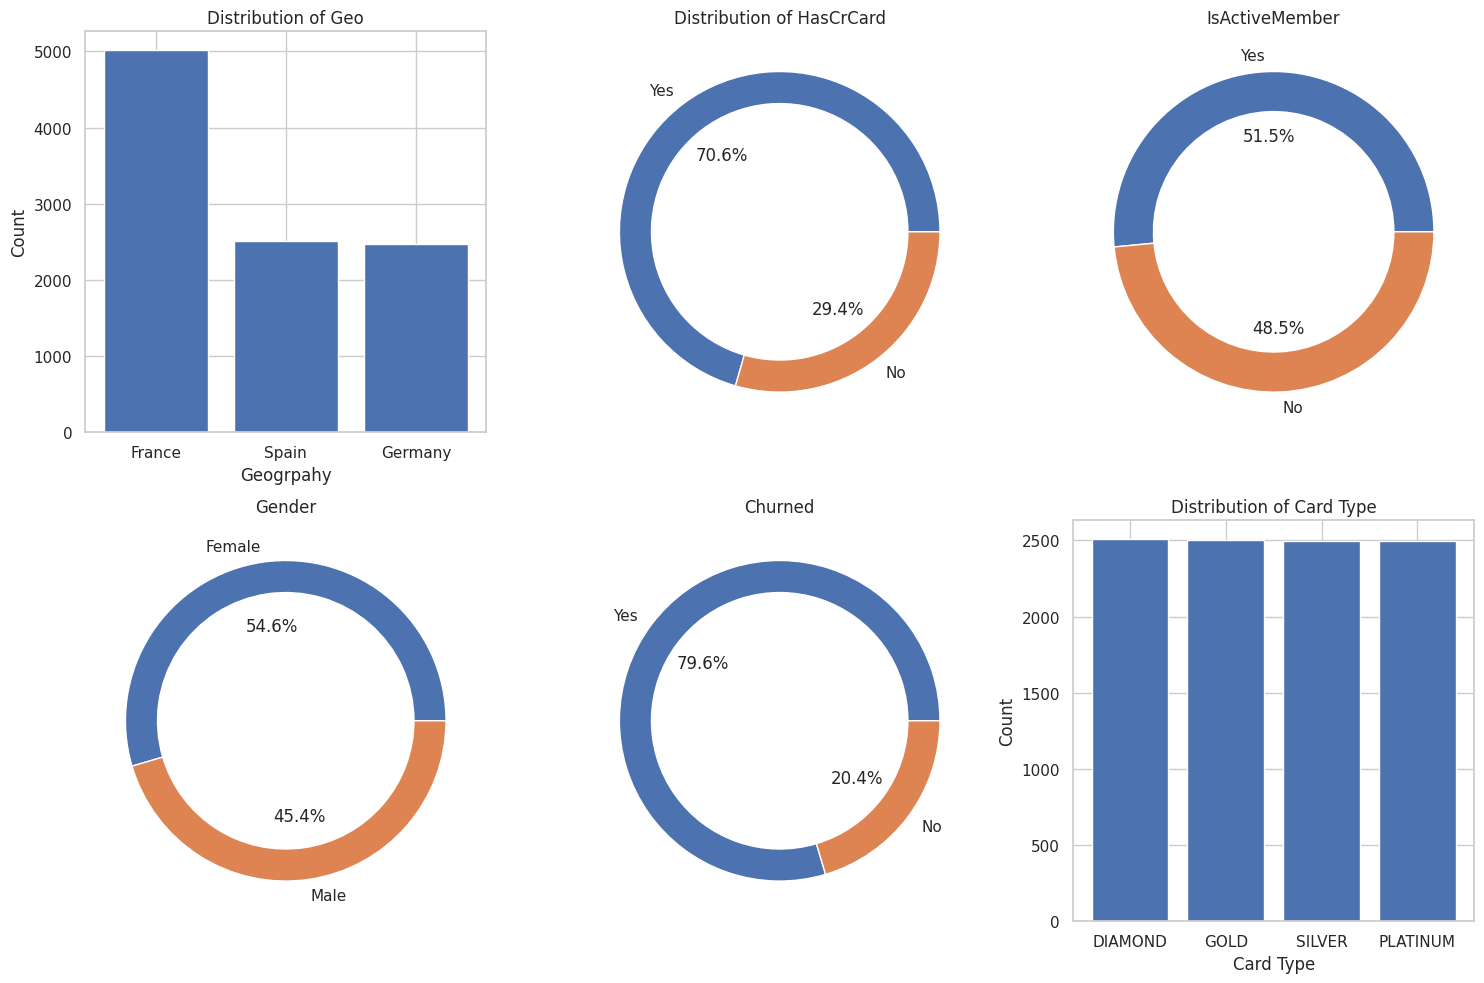

In [ ]:
# create subplots
fig, axs = plt.subplots(2,3, figsize=(15,10))

#Bar chart of Warehouse block
categoryG = df["Geography"].unique()
ValueG = df["Geography"].value_counts()

axs[0,0].bar(categoryG,ValueG)
axs[0,0].set_title("Distribution of Geo")
axs[0,0].set_xlabel("Geogrpahy")
axs[0,0].set_ylabel("Count")

#Donut chart for mode of shipment
CategoryHasCrCard = df["HasCrCard"].unique()
ValueHasCrCard = df["HasCrCard"].value_counts()
axs[0,1].pie(ValueHasCrCard,labels=CategoryHasCrCard,autopct="%1.1f%%",wedgeprops={"width":0.2})
axs[0,1].set_title("Distribution of HasCrCard")

#Donut Chart for IsActiveMember
CategoryIsActiveMember = df["IsActiveMember"].unique()
ValueIsActiveMember = df["IsActiveMember"].value_counts()
axs[0,2].pie(ValueIsActiveMember,labels=CategoryIsActiveMember,autopct="%1.1f%%",wedgeprops={"width":0.25})
axs[0,2].set_title("IsActiveMember")

#donut chart for gender
categoryGender = df["Gender"].unique()
valueGender = df["Gender"].value_counts()
axs[1,0].pie(valueGender,labels=categoryGender,autopct="%1.1f%%",wedgeprops={"width":0.2})
axs[1,0].set_title("Gender")

# pie chart for Churned
categoryChurned = df['Churned'].unique()
valueChurned = df['Churned'].value_counts()
axs[1,1].pie(valueChurned,labels=categoryChurned,autopct="%1.1f%%",wedgeprops={"width":0.2})
axs[1,1].set_title("Churned")

#Bar chart of Card Type
categoryCT = df["Card Type"].unique()
ValueCT = df["Card Type"].value_counts()

axs[1,2].bar(categoryCT,ValueCT)
axs[1,2].set_title("Distribution of Card Type")
axs[1,2].set_xlabel("Card Type")
axs[1,2].set_ylabel("Count")

plt.tight_layout()
plt.show()

**Categorical Variable Insights**

- Geography (Country Distribution)

Most customers are from France, followed by Spain and Germany.
France has the highest count, indicating that it might be the primary market for the business.
Spain and Germany have nearly equal distribution, meaning no significant imbalance between them.

- Has Credit Card

70.6% of customers have a credit card, while 29.4% do not.
The high percentage of customers with credit cards suggests that credit-based transactions might be common in this dataset.
A further investigation could explore whether having a credit card influences churn or other behaviors.

- Is Active Member

51.5% of customers are active members, while 48.5% are not.
The split is nearly balanced, indicating that there isn't a dominant preference between active and inactive members.
Understanding the impact of activity status on churn would be insightful.

- Gender Distribution

54.6% of customers are Female, and 45.4% are Male.
The gender distribution is relatively balanced but leans slightly toward females.
Further analysis could check whether gender has any influence on churn or other business-related metrics.

- Churn Rate

79.6% of customers have churned, while 20.4% have not.
This indicates a very high churn rate, which might be a serious issue for the business.
Investigating the factors influencing churn, such as geography, activity status, and credit card ownership, would be valuable.

- Card Type Distribution

The card type distribution is fairly even across Diamond, Gold, Silver, and Platinum.
No single card type seems to dominate the dataset.
It would be interesting to analyze if card type correlates with churn or customer loyalty.

**CHURN VS AGE, CREDIT SCORE, BALANCE**

<ipython-input-61-feca1b273601>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churned", y="Age", data=df, palette=["green", "red"])


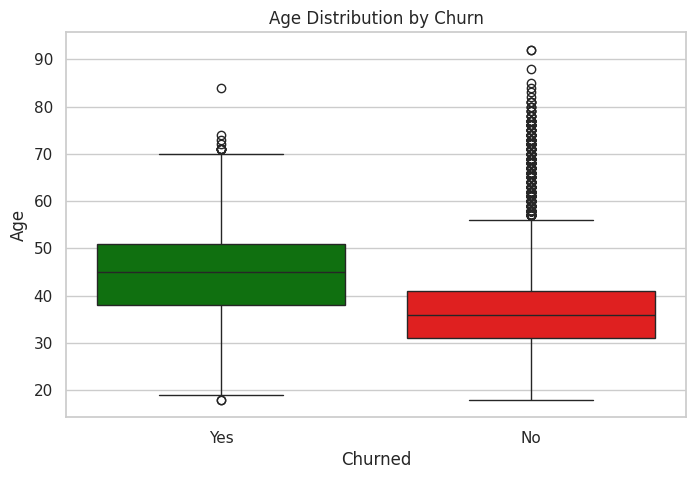

<ipython-input-61-feca1b273601>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churned", y="CreditScore", data=df, palette=["green", "red"])


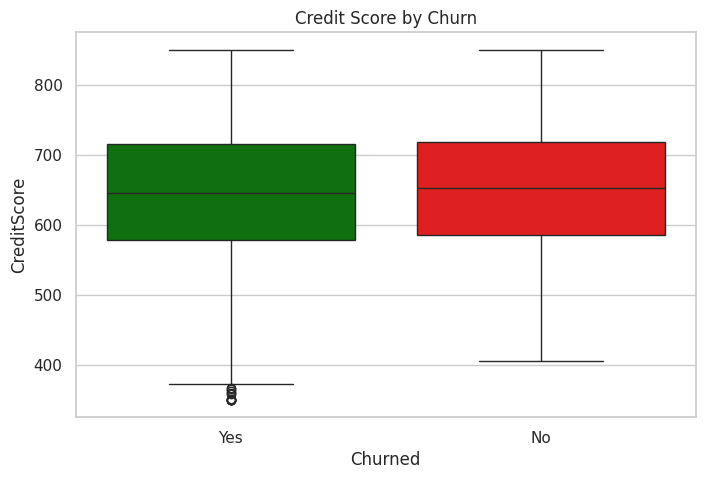

<ipython-input-61-feca1b273601>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churned", y="Balance", data=df, palette=["green", "red"])


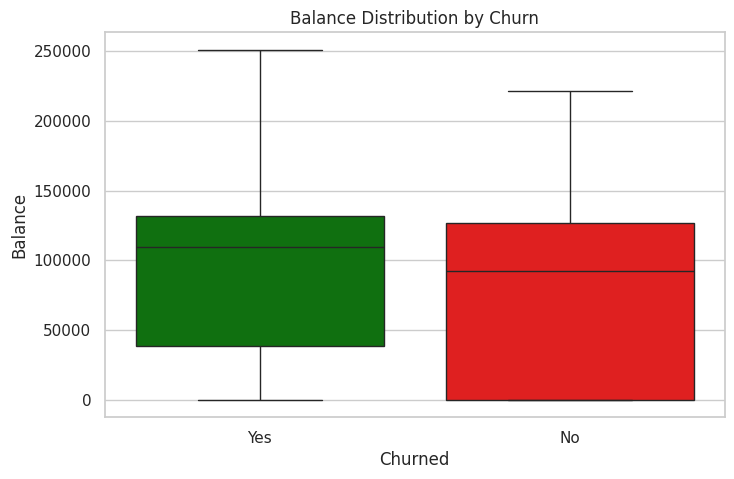

In [ ]:
# Boxplot for Age vs. Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churned", y="Age", data=df, palette=["green", "red"])
plt.title("Age Distribution by Churn")
plt.show()

# Boxplot for Credit Score vs. Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churned", y="CreditScore", data=df, palette=["green", "red"])
plt.title("Credit Score by Churn")
plt.show()

# Boxplot for Balance vs. Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churned", y="Balance", data=df, palette=["green", "red"])
plt.title("Balance Distribution by Churn")
plt.show()

 Churn vs. Age
- Older customers tend to churn more than younger ones.
- Banks should focus on retention strategies for older customers.

Churn vs. Credit Score
- Customers with lower credit scores churn more frequently.
- Targeted financial advisory services can help retain these customers.

Churn vs. Balance
- Many churned customers have zero balance, indicating inactive accounts.
- Banks should encourage active account usage with personalized engagement strategies.


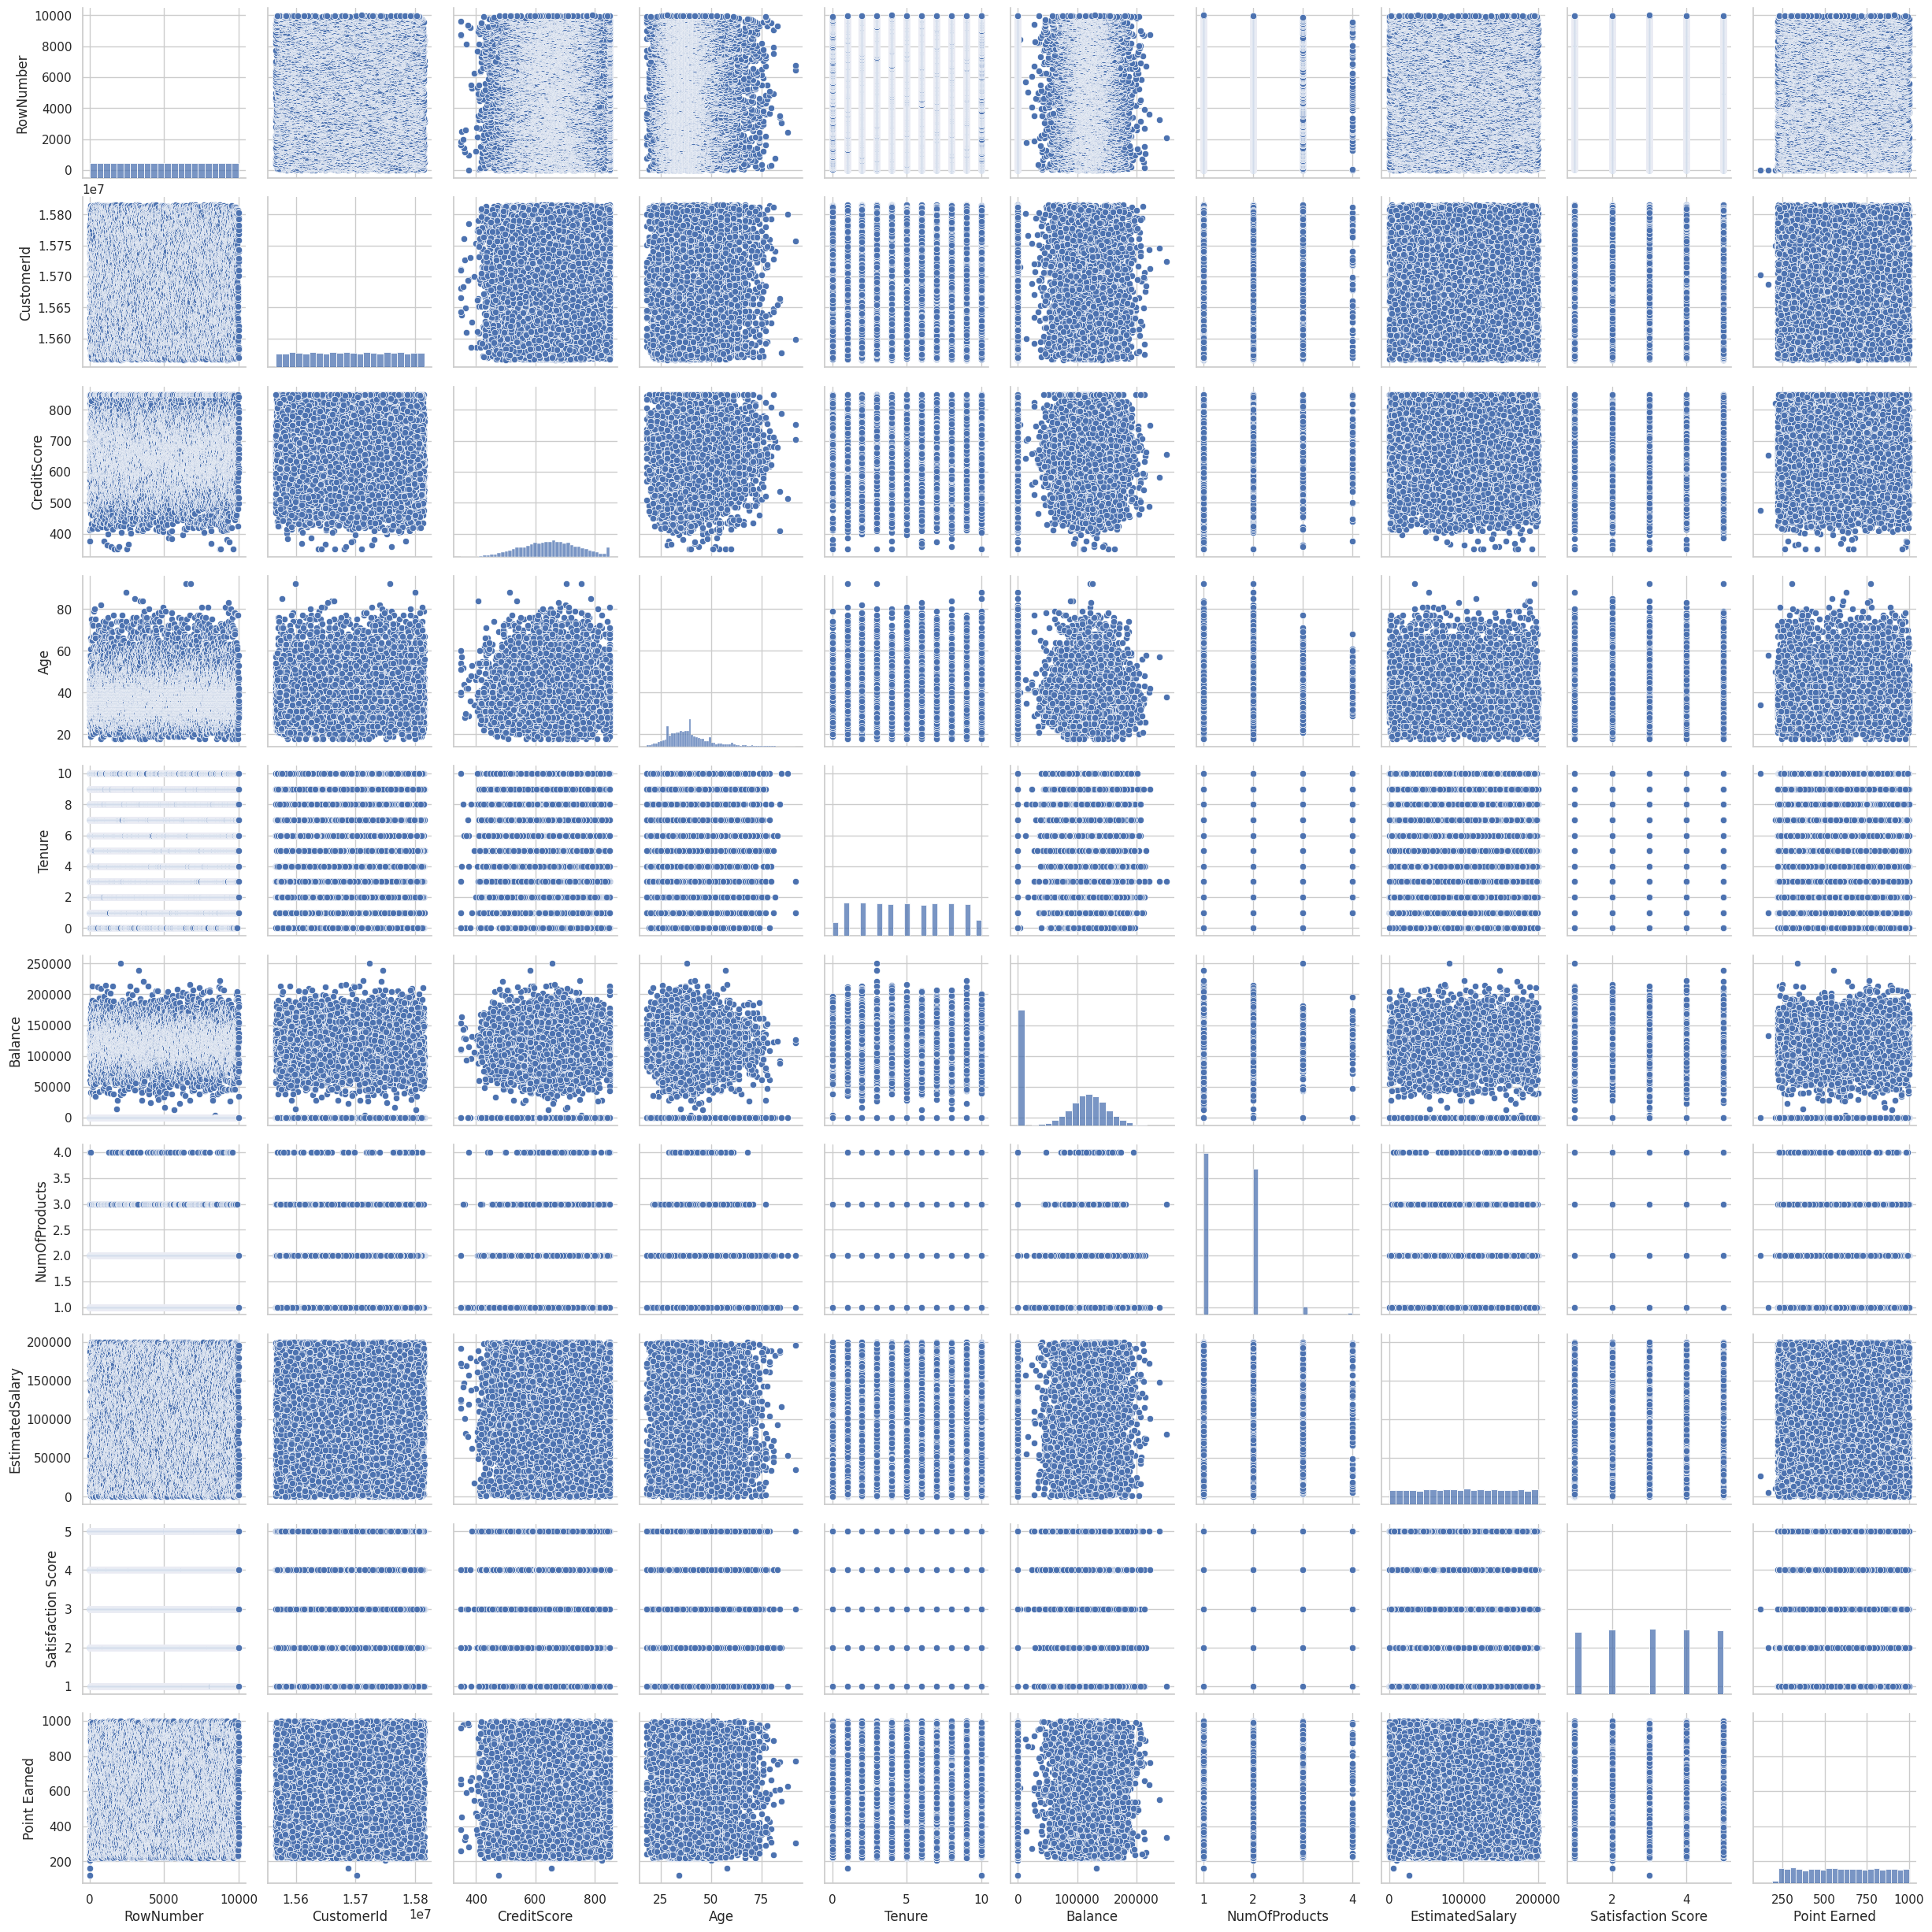

In [ ]:
# pairplot
sns.pairplot(df)

**BIVARIATE ANALYSIS:**

1. No Strong Linear Relationships

The scatterplots indicate that most variables do not show clear linear trends, meaning traditional correlation-based methods may not fully capture relationships.

2. Age vs. Balance

The data points are widely spread, suggesting that balance is not strongly dependent on age. However, there may be clusters of customers with zero balance.

3. NumOfProducts is Discrete

The variable NumOfProducts appears in vertical strips, meaning it takes on only specific values (e.g., 1, 2, 3, 4). This suggests it's categorical rather than truly numerical.

4. Tenure is Also Discrete

Similar to NumOfProducts, Tenure shows a stepped pattern, meaning it takes specific values rather than a continuous range.

5. Estimated Salary vs. Other Variables

Estimated salary appears uniformly distributed, meaning it may not be a key differentiator in customer behavior.

6. Balance Shows a Unique Distribution

Unlike Estimated Salary, Balance has a more concentrated distribution, suggesting some customers may not hold significant balances while others do.

7. Customer Satisfaction Score

The satisfaction score is discrete and evenly spread, suggesting predefined categories rather than continuous values.

Text(0.5, 1.0, 'Correlation Matrix')

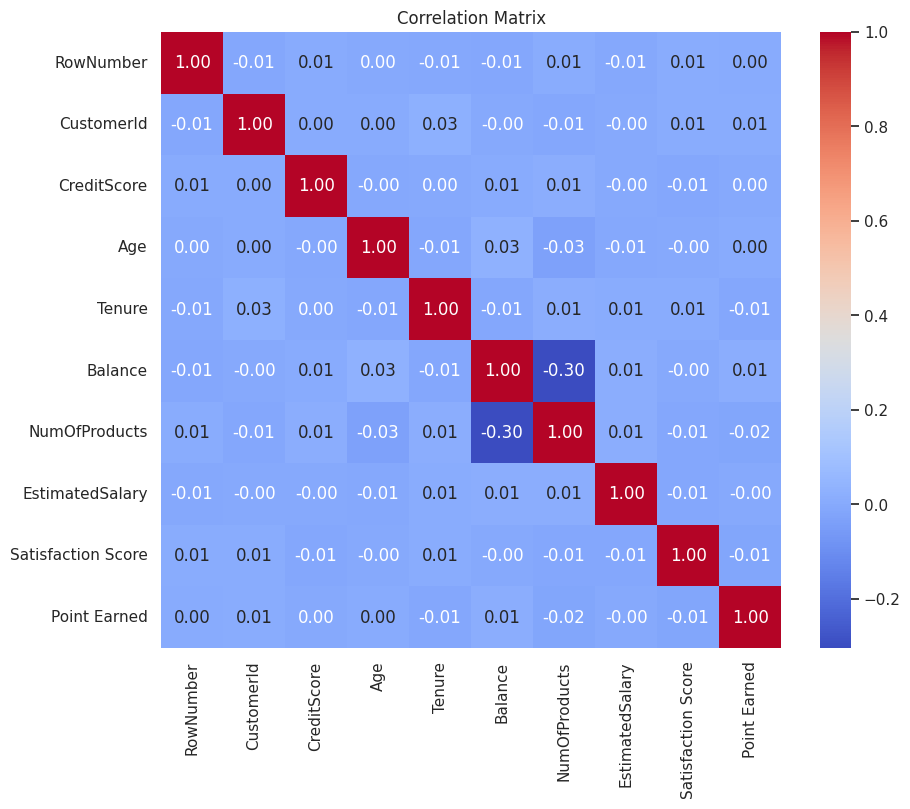

In [ ]:
# correlation
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm", fmt='.2f')
plt.title("Correlation Matrix")

**Correlation Matrix**:
- Weak Correlations Overall

Most variables show very weak correlations with each other, as indicated by the predominantly blue shades in the heatmap. This suggests that the dataset has little multicollinearity among features.

- Balance vs. Number of Products (-0.30)

There is a moderate negative correlation between Balance and NumOfProducts. This suggests that customers with a higher balance tend to have fewer products with the bank, possibly indicating a preference for saving rather than using multiple banking services.

- Minimal Relationship Between Credit Score and Other Features

Credit Score shows almost no correlation with variables like Age, Tenure, and Balance. This means creditworthiness may not be a strong influencing factor in this dataset's customer behaviors.

- Tenure, Age, and Estimated Salary Have Almost No Effect on Other Features

The correlations of Tenure, Age, and Estimated Salary with other numerical features are near zero. This suggests that these factors may not play a significant role in predicting customer behavior or attrition.

- Satisfaction Score and NumOfProducts (-0.02, Near Zero)

No strong relationship exists between Satisfaction Score and the number of products a customer holds, indicating that having multiple products does not necessarily make customers more satisfied.

**Conclusion**:
- There are no strong correlations among the features, meaning no single variable heavily influences another.
- The only noticeable trend is the negative correlation between Balance and NumOfProducts, which might suggest a strategic banking preference among customers.
- More advanced techniques like feature engineering or non-linear analysis may be needed to uncover deeper insights.

**Summary of Insights**

Customer Behavior & Retention Strategies

- Older customers (above 50 years) churn more – Implement loyalty programs & exclusive services.
- Customers with lower credit scores are at higher risk of leaving – Offer better financial advisory.
- Zero balance accounts have a higher churn rate – Encourage active transactions.

Financial & Product-Based Observations
- Customers with fewer products are more likely to churn – Upsell additional banking services.
- Customers with low salaries don’t necessarily churn more, but retention strategies should still be targeted.

**Recommendations**
- Target High-Risk Customers:

Offer financial incentives to customers with zero balance accounts.
Provide personalized financial planning for low credit score customers.

- Improve Customer Engagement:

Launch loyalty programs for older customers.
Encourage active membership and product bundling.

- Optimize Product & Service Offerings:

Create specialized banking services for retirement-age customers.
Offer personalized loans & savings plans for customers at risk of leaving.
